In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [39]:
path = '/home/zane/Documents/code/research/uw2020/masuite/tmp/masuite/masuite_id__cartpole_simplepg-0_pos.csv'
df = pd.read_csv(path)

In [40]:
df.head()

,agent0_grad_norms,agent0_avg_rets,agent0_avg_lens,agent0_loss
0,"[3.6465539932250977, 0.9225412607192993, 8.493...",24.704433,24.704433,23.574938
1,"[4.445135593414307, 1.1626895666122437, 10.178...",26.812834,26.812834,27.739611
2,"[4.303347587585449, 1.1983530521392822, 9.4300...",25.671795,25.671795,24.974813
3,"[5.033361434936523, 1.49270761013031, 10.51794...",27.053763,27.053763,28.995085
4,"[4.924530029296875, 1.6881932020187378, 9.8040...",25.927461,25.927461,27.475410


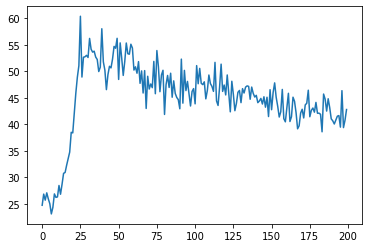

In [41]:
plt.plot(df['agent0_avg_rets'])

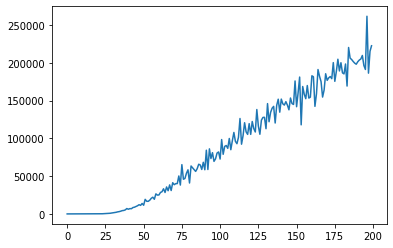

In [42]:
plt.plot(df['agent0_loss'])

In [46]:
path2 = '/home/zane/Documents/code/research/uw2020/masuite/tmp/masuite/masuite_id__cartpole_simplepg-0_neg.csv'
df2 = pd.read_csv(path2)

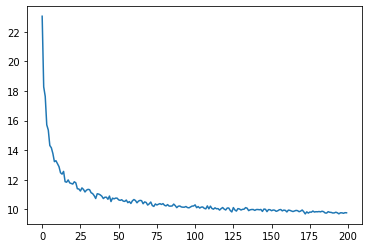

In [48]:
plt.plot(df2['agent0_avg_rets'])

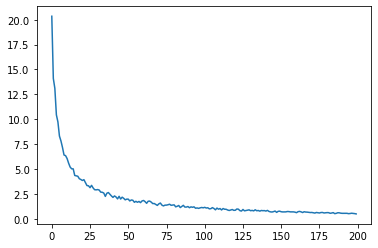

In [49]:
plt.plot(df2['agent0_loss'])

In [60]:
path3 = '/home/zane/Documents/code/research/uw2020/masuite/tmp/masuite/masuite_id__cartpole_simplepg-0.csv'
df3 = pd.read_csv(path3)

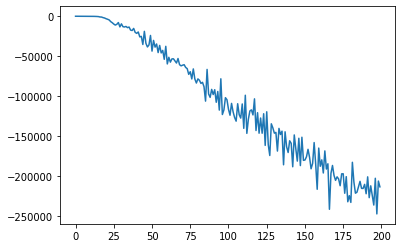

In [61]:
plt.plot(df3['agent0_loss'])

<AxesSubplot:>

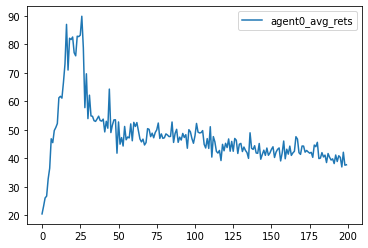

In [62]:
df3.plot(y='agent0_avg_rets')

In [20]:
path4 = '/home/zane/Documents/code/research/uw2020/masuite/tmp/masuite/masuite_id__cartpole2p_simplepg-0.csv'
df4 = pd.read_csv(path4)

In [21]:
df4.head()

,agent0_grad_norms,agent0_avg_rets,agent0_avg_lens,agent0_loss,agent1_grad_norms,agent1_avg_rets,agent1_avg_lens,agent1_loss
0,"[1.7322006225585938, 0.24642863869667053, 5.90...",18.253807,25.421320,-15.059106,"[2.250539779663086, 0.4718930423259735, 6.9604...",22.035533,25.421320,-16.748814
1,"[1.9618419408798218, 0.2945686876773834, 6.767...",19.178571,25.551020,-15.303463,"[2.2918875217437744, 0.5035908222198486, 6.942...",21.714286,25.551020,-16.649792
2,"[2.2850863933563232, 0.4761064350605011, 8.286...",25.292208,32.538961,-19.922586,"[2.797173023223877, 0.6328479051589966, 8.3201...",24.980519,32.538961,-21.071566
3,"[3.296766757965088, 0.5484692454338074, 12.423...",27.192857,35.864286,-24.122341,"[3.4701650142669678, 0.8255056738853455, 9.569...",28.135714,35.864286,-25.473581
4,"[3.9106621742248535, 0.760940670967102, 14.100...",34.658537,40.959350,-27.532351,"[3.97536039352417, 0.9673369526863098, 10.4303...",27.430894,40.959350,-27.593853


<AxesSubplot:>

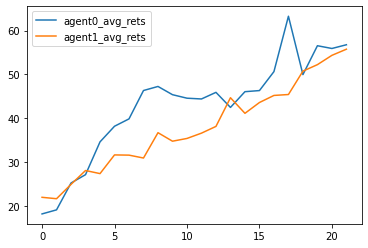

In [22]:
df4.plot(y=['agent0_avg_rets', 'agent1_avg_rets'])

<AxesSubplot:>

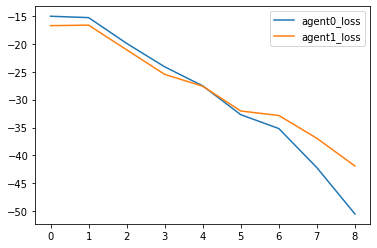

In [19]:
df4.plot(y=['agent0_loss', 'agent1_loss'])